BI名企班 谢雅楠 20210123

## Action1 交通流量预测  
JetRail高铁的乘客数量预测  
数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量
以每天为单位聚合数据集

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [3]:
## 转换为pandas中的日期类型

train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [4]:
## 将datetime作为train的索引
train.index = train.Datetime
train.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2


In [5]:
## 去掉ID Datetime
train.drop(['ID', 'Datetime'], axis=1, inplace=True)
train.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [6]:
## 按天进行采样
daily_train = train.resample('D').sum()
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [8]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train['Count']
daily_train.drop(['Count'], axis=1, inplace=True)
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


In [16]:
from fbprophet import Prophet

# 拟合prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)

# 预测未来7个月
future = m.make_future_dataframe(periods=213)

# 对future进行预测
forecast = m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-685.830303,-2215.527293,173.186594,-685.830303,-685.830303,-426.745914,-426.745914,-426.745914,-994.370880,-994.370880,-994.370880,567.624966,567.624966,567.624966,0.0,0.0,0.0,-1112.576217
1,2012-08-26,-677.725085,-2487.748235,-88.392258,-677.725085,-677.725085,-584.652256,-584.652256,-584.652256,-1143.348719,-1143.348719,-1143.348719,558.696463,558.696463,558.696463,0.0,0.0,0.0,-1262.377341
2,2012-08-27,-669.619867,-794.403023,1514.845298,-669.619867,-669.619867,1004.152714,1004.152714,1004.152714,457.255145,457.255145,457.255145,546.897569,546.897569,546.897569,0.0,0.0,0.0,334.532847
3,2012-08-28,-661.514649,-768.562778,1653.480126,-661.514649,-661.514649,1140.942635,1140.942635,1140.942635,607.905318,607.905318,607.905318,533.037317,533.037317,533.037317,0.0,0.0,0.0,479.427986
4,2012-08-29,-653.409431,-836.340638,1609.641544,-653.409431,-653.409431,1074.404622,1074.404622,1074.404622,556.460626,556.460626,556.460626,517.943996,517.943996,517.943996,0.0,0.0,0.0,420.995191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16285.031861,15279.967616,17851.007724,15800.829640,16670.328737,300.148135,300.148135,300.148135,556.460626,556.460626,556.460626,-256.312491,-256.312491,-256.312491,0.0,0.0,0.0,16585.179996
971,2015-04-23,16312.674822,15152.935344,17602.866338,15826.325858,16701.445709,67.224877,67.224877,67.224877,360.073991,360.073991,360.073991,-292.849114,-292.849114,-292.849114,0.0,0.0,0.0,16379.899699
972,2015-04-24,16340.317782,14815.532443,17416.827735,15851.633271,16732.504007,-177.983398,-177.983398,-177.983398,156.024520,156.024520,156.024520,-334.007918,-334.007918,-334.007918,0.0,0.0,0.0,16162.334384
973,2015-04-25,16367.960743,13675.481926,16228.730939,15875.480444,16763.318967,-1373.384613,-1373.384613,-1373.384613,-994.370880,-994.370880,-994.370880,-379.013732,-379.013732,-379.013732,0.0,0.0,0.0,14994.576130


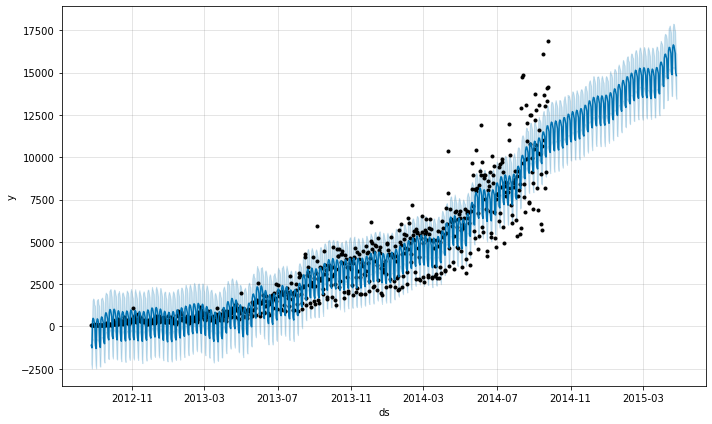

In [18]:
m.plot(forecast);

## Action2 资金流入流出预测

https://tianchi.aliyun.com/competition/entrance/231573/information  
数据集一共包括4张表：用户基本信息数据、用户申购赎回数据、收益率表和银行间拆借利率表  
2.8万用户，284万行为数据，294天拆解利率，427天收益率  
2013-07-01到2014-08-31，预测2014年9月的申购和赎回


In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('user_balance_table.csv', parse_dates=['report_date'])
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [5]:
total_balance = data.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
total_balance

<ipython-input-5-7881cc95f7e7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_balance = data.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [8]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]

<ipython-input-10-f9edd5b9fca1>:8: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = sm.tsa.seasonal_decompose(data, freq=30)


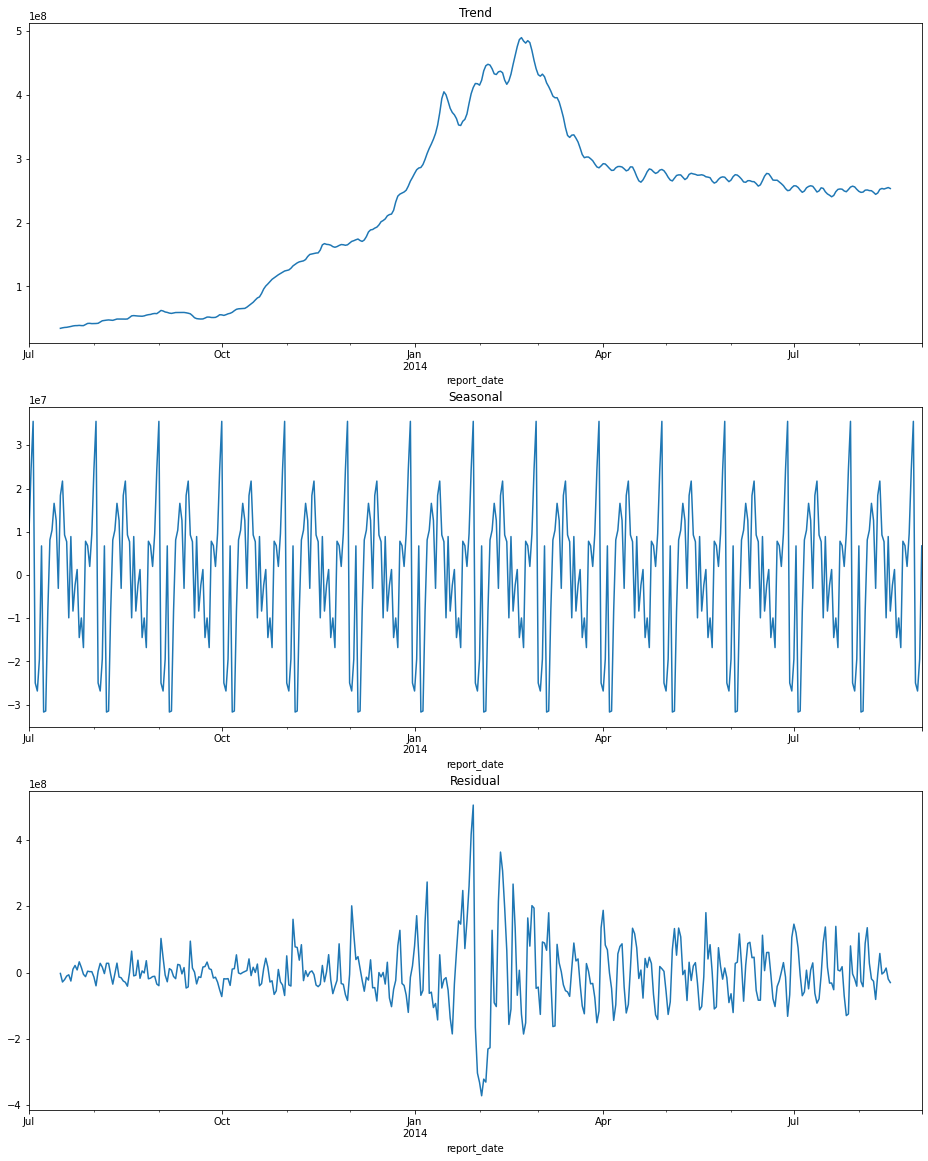

In [10]:
## plots

import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_stl(data):
    # stl -> trend, seasonal, residual
    result = sm.tsa.seasonal_decompose(data, freq=30)
    # viz
    fig = plt.figure(figsize=(16,20))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title="Trend")
    result.seasonal.plot(ax=ax2, title="Seasonal")
    result.resid.plot(ax=ax3, title="Residual")

    
plot_stl(purchase.total_purchase_amt)
    

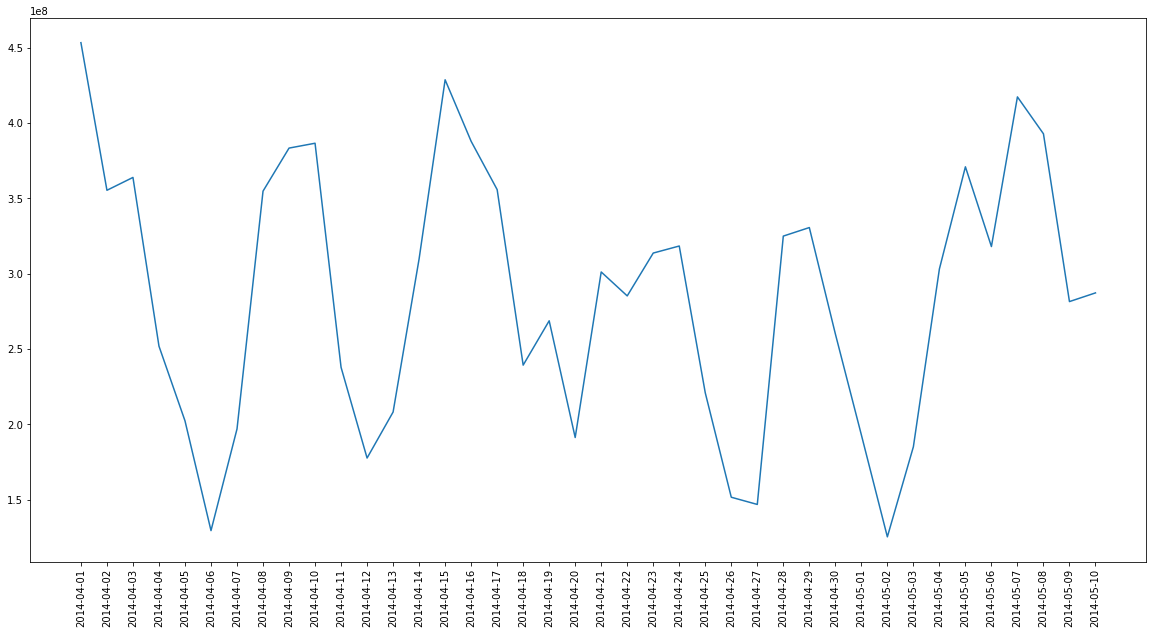

In [15]:
purchase2 = purchase[(purchase.index >= '2014-04-01') &(purchase.index <= '2014-05-10')]

plt.figure(figsize=(20,10))
plt.plot(purchase2.total_purchase_amt)

date_range = pd.date_range('2014-04-01', '2014-05-10')
plt.xticks(date_range, rotation=90)
plt.show()

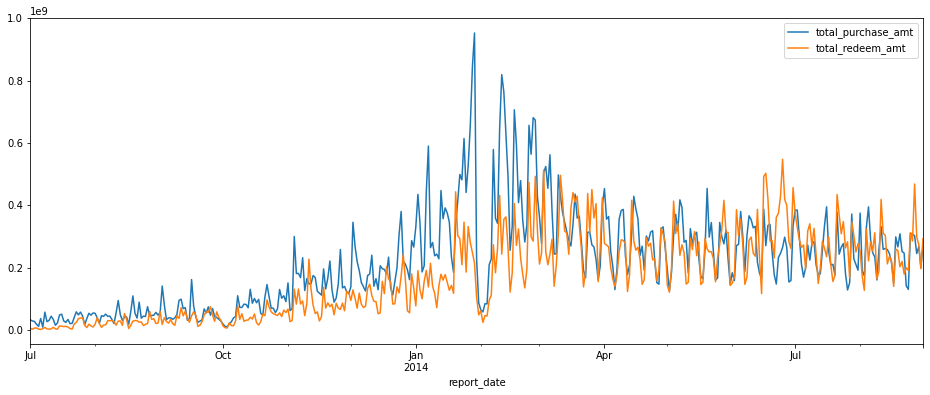

In [11]:
## 时间序列的平稳性
total_balance.plot(figsize=(16,6))
plt.show()

In [12]:
## 查分
from statsmodels.tsa.stattools import adfuller

t = adfuller(purchase['total_purchase_amt'])
t
# ==> 无法拒绝原假设，不平稳

(-1.5898802926313504,
 0.4886749751375929,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15960.28197033403)

In [13]:
# 一阶查分
diff1 = purchase.diff(1)
t = adfuller(diff1[1:])
t ## 拒绝原假设，平稳

(-7.947102224652337,
 3.198186862488301e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [14]:
# 一阶查分
diff1 = redeem.diff(1)
t = adfuller(diff1[1:])
t

(-11.69198690696878,
 1.6443717458502964e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

In [23]:
## 选择合适的p q
import pmdarima as pm
pm.arima.ndiffs(purchase, test='adf')

0

### 1 Prophet

In [25]:
purchase['ds'] = purchase.index
purchase.rename(columns={'total_purchase_amt': 'y'}, inplace=True)
purchase

,y,ds
report_date,,
2013-07-01,32488348,2013-07-01
2013-07-02,29037390,2013-07-02
2013-07-03,27270770,2013-07-03
2013-07-04,18321185,2013-07-04
2013-07-05,11648749,2013-07-05
...,...,...
2014-08-27,302194801,2014-08-27
2014-08-28,245082751,2014-08-28
2014-08-29,267554713,2014-08-29


In [26]:
redeem['ds'] = purchase.index
redeem.rename(columns={'total_redeem_amt': 'y'}, inplace=True)
redeem

,y,ds
report_date,,
2013-07-01,5525022,2013-07-01
2013-07-02,2554548,2013-07-02
2013-07-03,5953867,2013-07-03
2013-07-04,6410729,2013-07-04
2013-07-05,2763587,2013-07-05
...,...,...
2014-08-27,468164147,2014-08-27
2014-08-28,297893861,2014-08-28
2014-08-29,273756380,2014-08-29


In [28]:
purchase = purchase.reset_index(drop=True)
redeem = redeem.reset_index(drop=True)

In [29]:
from fbprophet import Prophet

model = Prophet(weekly_seasonality=True, seasonality_prior_scale=0.1, n_changepoints=3)
model.fit(purchase)
future = model.make_future_dataframe(periods=30)
purchase_pred = model.predict(future)

purchase_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.272717e+07,-7.709917e+07,1.434098e+08,-1.272717e+07,-1.272717e+07,4.492200e+07,4.492200e+07,4.492200e+07,4.492200e+07,4.492200e+07,4.492200e+07,0.0,0.0,0.0,3.219483e+07
1,2013-07-02,-1.155806e+07,-6.715737e+07,1.467859e+08,-1.155806e+07,-1.155806e+07,4.763586e+07,4.763586e+07,4.763586e+07,4.763586e+07,4.763586e+07,4.763586e+07,0.0,0.0,0.0,3.607780e+07
2,2013-07-03,-1.038896e+07,-8.484913e+07,1.419518e+08,-1.038896e+07,-1.038896e+07,3.769064e+07,3.769064e+07,3.769064e+07,3.769064e+07,3.769064e+07,3.769064e+07,0.0,0.0,0.0,2.730168e+07
3,2013-07-04,-9.219849e+06,-1.015070e+08,1.231016e+08,-9.219849e+06,-9.219849e+06,1.946291e+07,1.946291e+07,1.946291e+07,1.946291e+07,1.946291e+07,1.946291e+07,0.0,0.0,0.0,1.024306e+07
4,2013-07-05,-8.050742e+06,-1.316176e+08,9.649120e+07,-8.050742e+06,-8.050742e+06,-1.791567e+07,-1.791567e+07,-1.791567e+07,-1.791567e+07,-1.791567e+07,-1.791567e+07,0.0,0.0,0.0,-2.596641e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,1.975941e+08,6.652931e+07,2.933252e+08,1.975941e+08,1.975941e+08,-1.791567e+07,-1.791567e+07,-1.791567e+07,-1.791567e+07,-1.791567e+07,-1.791567e+07,0.0,0.0,0.0,1.796784e+08
453,2014-09-27,1.968249e+08,1.831715e+07,2.415040e+08,1.968249e+08,1.968249e+08,-6.953615e+07,-6.953615e+07,-6.953615e+07,-6.953615e+07,-6.953615e+07,-6.953615e+07,0.0,0.0,0.0,1.272888e+08
454,2014-09-28,1.960558e+08,1.528290e+07,2.519245e+08,1.960558e+08,1.960558e+08,-6.225959e+07,-6.225959e+07,-6.225959e+07,-6.225959e+07,-6.225959e+07,-6.225959e+07,0.0,0.0,0.0,1.337962e+08
455,2014-09-29,1.952866e+08,1.221350e+08,3.630246e+08,1.952866e+08,1.952866e+08,4.492200e+07,4.492200e+07,4.492200e+07,4.492200e+07,4.492200e+07,4.492200e+07,0.0,0.0,0.0,2.402086e+08


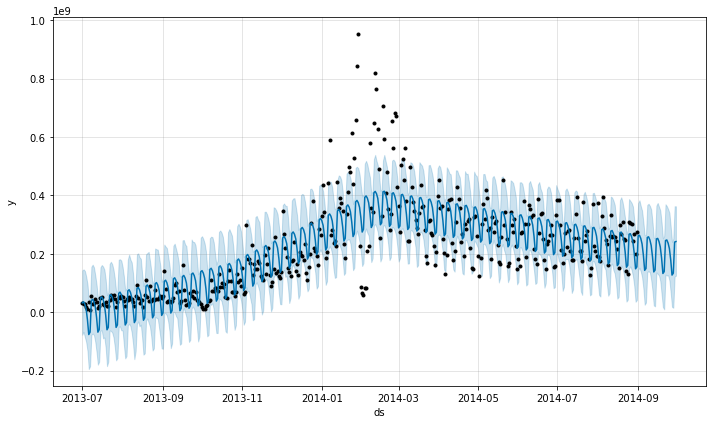

In [30]:
model.plot(purchase_pred);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


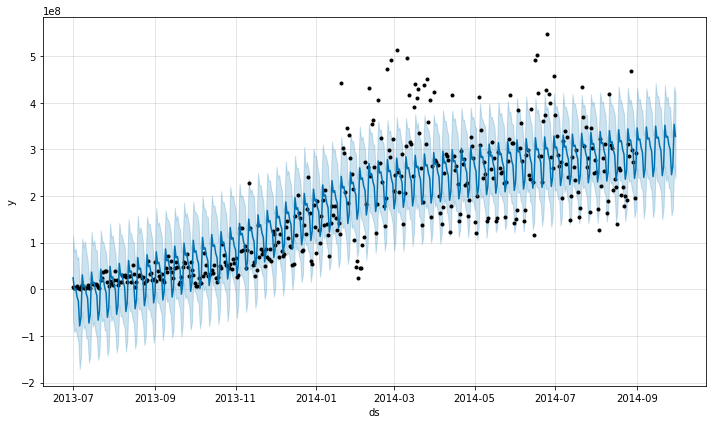

In [32]:
model2 = Prophet(weekly_seasonality=True, seasonality_prior_scale=0.1, n_changepoints=3)
model2.fit(redeem)
future = model2.make_future_dataframe(periods=30)
redeem_pred = model2.predict(future)
redeem_pred
model2.plot(redeem_pred);

### 2 Arima

In [16]:
## model

from statsmodels.tsa.arima_model import ARIMA

# type=levels 对原始数据维度上进行预测，相当于进行反差分
model1 = ARIMA(purchase,order=(7,1,5)).fit()
purchase_pred = model1.predict('2014-09-01', '2014-09-30',typ='levels')

model2 = ARIMA(redeem,order=(7,1,5)).fit()
redeem_pred = model2.predict('2014-09-01', '2014-09-30',typ='levels')



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp


In [17]:
model1.aic

16669.646033915138

In [18]:
model2.aic

16520.881748530057

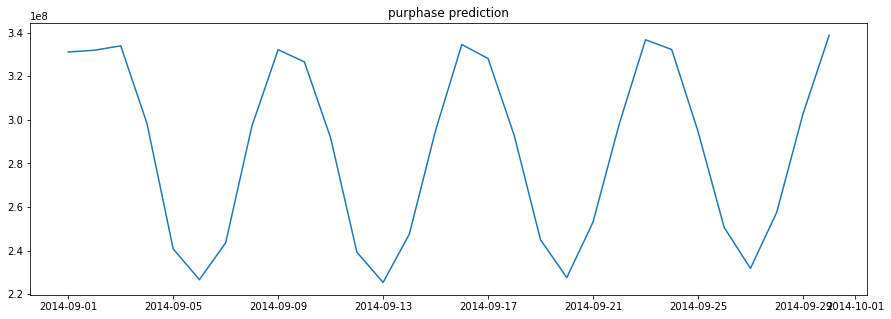

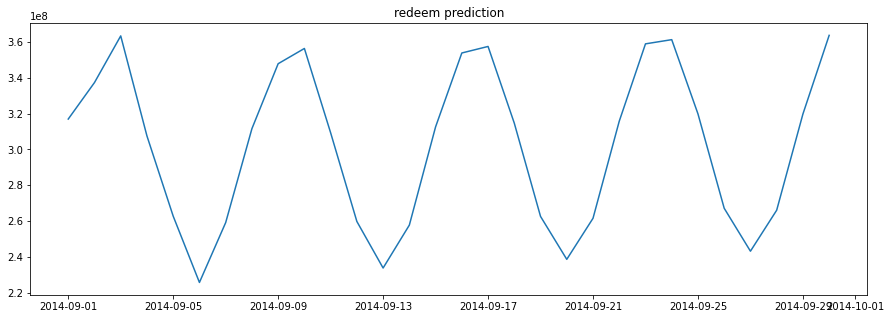

In [19]:
plt.figure(figsize=(15,5))
plt.title('purphase prediction')
plt.plot(purchase_pred)

plt.figure(figsize=(15,5))
plt.title('redeem prediction')
plt.plot(redeem_pred)

In [20]:
result = pd.DataFrame()
result['date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values

result['date'] = result['date'].apply(lambda x: str(x).replace('-', '')[0:8])

In [21]:
result.to_csv('arima.csv', header=None, index=False)

In [36]:
### score = 100.9988

Screen Shot 2021-01-23 at 5.37.42 pm.png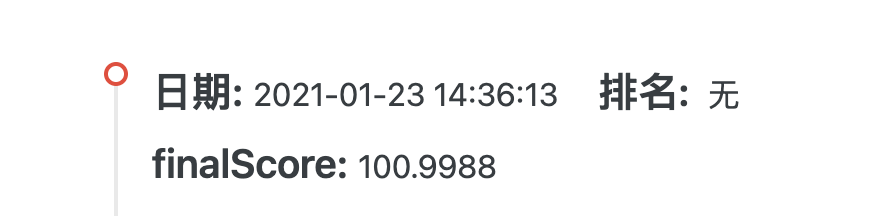